In [ ]:
# 유임승차 비율이 높은 역 찾기1
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data) # 열 이름은 데이터에 포함시키지 않는다.
mx = 0 # rate값이 가장 높은 내용을 mx에 저장
rate = 0 # 유임승차 인원의 비율 (유임승차인원 / 무임승차인원)

for row in data:
    for i in range(4,8):
        row[i] = int(row[i]) # [4]~[7]번 열까지 정수형으로 형변환
    rate = row[4] / row[6] # 한줄한줄 rate값을 구한다 
    if rate > mx: # 최근 찾은 rate값이 mx에 들어있는 값보다 크면
        mx = rate # mx에 rate값 저장
print(mx)
# 오류나는 이유 : data의 무임승차인원에 존재하는 0값들을 계산하지 못해서. 예외 처리 필요 

In [ ]:
# 유임승차 비율이 높은 역 찾기2
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0 
rate = 0 # 유임승차인원의 비율 (유임승차인원 / 전체인원(유,무임))

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000: # 무임승차인원이 0명이 아니고, 전체인원이 10만명 이상일 때
        rate = row[4] / (row[4] + row[6])
        if rate > mx:
            mx = rate
            print(row, round(rate,2)) # mx값이 바뀔때마다 해당 역의 정보와 rate값을 소수점 2번째자리까지 구해서 출력

In [ ]:
# 유임승차 비율이 높은 역 찾기3
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4] + row[6])
        if rate > mx:
            mx = rate
            mx_station = row[3] + ' ' + row[1] # 최대 rate값을 가지는 역이름과 호선정보를 저장            
print(mx_station, round(mx * 100,2))

In [ ]:
# 유임승차, 유임하차, 무임승차, 무임하차 각각 인원이 가장 많은 역 찾기
# rate = 각각의 최대 인원, 각각의 rate가 저장될 mx 4개 0으로 초기화, mx = [0] * 4
# mx_station = 각각의 최대 rate가 가리키는 역 정보 4개 ''으로 초기화, mx_station = [''] * 4
# 유임승차 [4] -> mx[0]에 저장, 유임하차 [5] -> mx[1]에 저장, 무임승차 [6] -> mx[2]에 저장, 무임하차 [7] -> mx[3]에 저장
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = [0] * 4
mx_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
        if row[i] > mx[i-4]: # 유임승차 기준 row[4] 값이 mx[i-4] 값보다 크면
            mx[i-4] = row[i] # mx[i-4]에 row[4]값 저장, row[4]의 최대 rate 값은 mx[0]에 저장됨
            mx_station[i-4] = row[3] + ' ' + row[1] # mx_station[i-4]값에 역 정보 저장, i가 4~7까지 반복
for i in range(4):
    print(label[i] + ' : ' + mx_station[i], mx[i]) # 각각의 정보 출력

In [ ]:
# 역 별로 유임승차, 유임하차, 무임승차, 무임하차 비율 그래프로 표현
import csv
import matplotlib.pyplot as plt
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family = 'Malgun Gothic')

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels = label, colors = c, autopct = '%1.f%%')
    plt.axis('equal')
    #plt.savefig(row[3] + ' ' + row[1] + '.png') # savefig를 통해서 png파일로 저장
    plt.show() # 원 그래프로 표현

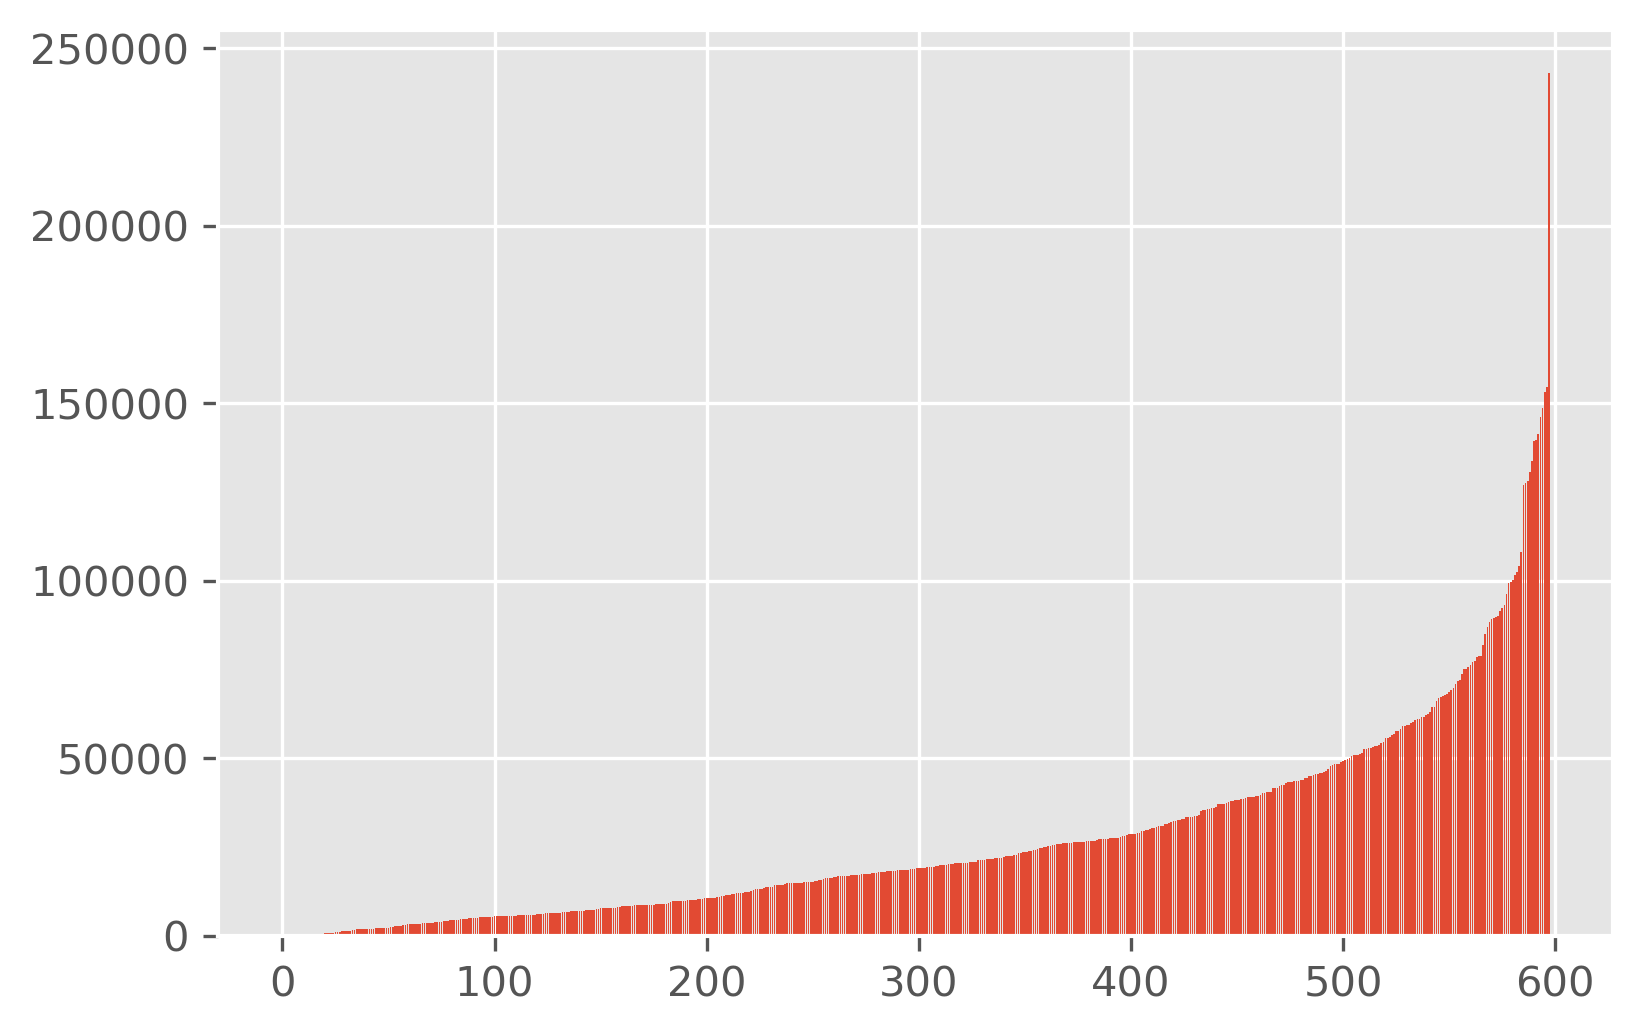

In [3]:
# 역 별로 7시에 승차하는 인원의 수를 그래프로 표현
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result = []

for row in data:
    row[4:] = map(int, row[4:]) # map()함수를 사용해서 row[4:]의 값을 정수형으로 형변환
    result.append(row[10]) # result에 row[10]이 가리키는, 7시에 승차하는 인원을 저장
    
import matplotlib.pyplot as plt
result.sort() # 오름차순 정렬
plt.figure(dpi = 300)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show() # len(result)개의 result값을 바 그래프로 표현

In [ ]:
# 역 별로 7~9시간에 승차하는 인원의 수를 그래프로 표현
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2])) # row[10], row[12], row[14]가 가리키는 7시 승차, 8시 승차, 9시 승차 인원을 더해서 result에 저장
    
import matplotlib.pyplot as plt
result.sort()
plt.figure(dpi=300)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

In [ ]:
# 7~9시에 승차하는 인원의 수가 가장 많은 역 정보 나타내기
import csv
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''

for row in data:
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > mx:
        mx = sum(row[10:15:2])
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)
# 분석결과 : 신림(2호선) 7~9시 승차인원 809541명